<a href="https://colab.research.google.com/github/oitik/Robovox_Challenge/blob/master/oitik_final_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import random
import statistics
from collections import Counter
from scipy import stats
import os
from tqdm import tqdm
import string
import statistics
import re
import zipfile


from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import joblib



import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

In [3]:
import librosa
import librosa.display

import IPython.display as ipd

def sample_audio(filename):
    # Load the audio file
    data, sample_rate = librosa.load(filename)

    # Plot the waveform
    plt.figure(figsize=(5, 2))
    plt.plot(data)
    plt.title('Waveform')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.show()

    # Play the audio
    return ipd.Audio(data, rate=sample_rate)


In [4]:
!pip install speechbrain

import torchaudio
from speechbrain.pretrained import EncoderClassifier
import torch


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# initialize the model
# initialize the model
model = EncoderClassifier.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb")

hyperparams.yaml:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

embedding_model.ckpt:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

In [5]:
def sample_audio2(file_path):
    # Load audio file
    waveform, sample_rate = torchaudio.load(file_path)
    # Plot the amplitude waveform
    plt.figure(figsize=(5, 2))
    plt.plot(waveform[0].numpy())
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('Amplitude Waveform of Audio Signal')
    plt.show()


In [6]:
def plot_spectrogram(file_path):
    # Load audio file
    waveform, sample_rate = torchaudio.load(file_path)

    # Plot the spectrogram
    plt.figure(figsize=(5, 3))
    plt.specgram(waveform[0].numpy(), Fs=sample_rate, cmap='viridis')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Spectrogram of Audio Signal')
    plt.colorbar(format='%+2.0f dB')
    plt.show()


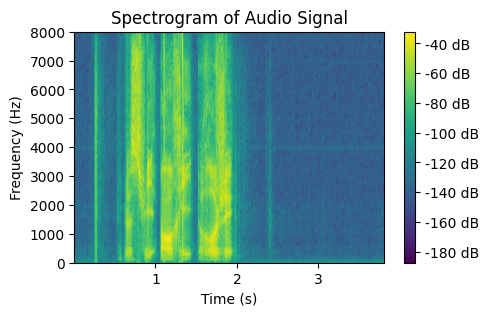

In [7]:
# Example usage
audio_file_path = '/content/drive/MyDrive/dataset/single-channel/denoised/spk_10-10_21_0_0_d2_ch5.wav'
plot_spectrogram(audio_file_path)

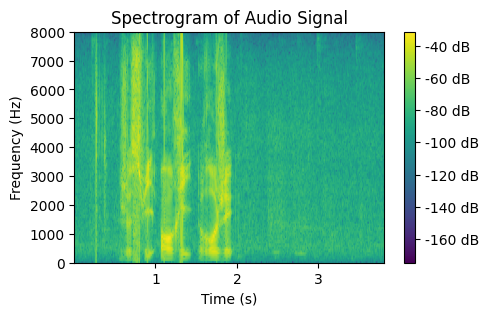

In [ ]:
audio_file_path = '/content/drive/MyDrive/dataset/single-channel/enrollment/spk_10-10_21_0_0_d2_ch5.wav'
plot_spectrogram(audio_file_path)

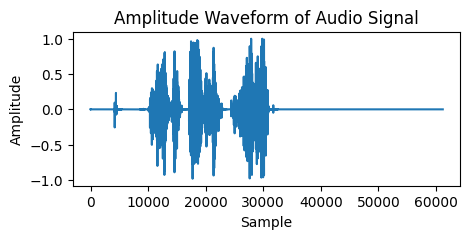

In [8]:
audio_file_path = '/content/drive/MyDrive/dataset/single-channel/denoised/spk_10-10_21_0_0_d2_ch5.wav'
sample_audio2(audio_file_path)

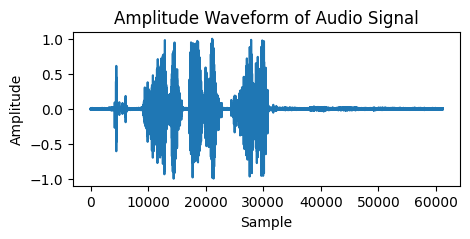

In [9]:
audio_file_path = '/content/drive/MyDrive/dataset/single-channel/enrollment/spk_10-10_21_0_0_d2_ch5.wav'
sample_audio2(audio_file_path)

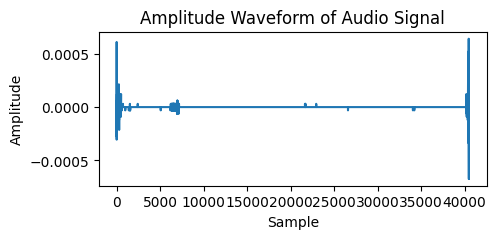

In [10]:
tp = '/content/drive/MyDrive/dataset/single-channel/denoised_test/0000f88619.wav'
sample_audio2(tp)

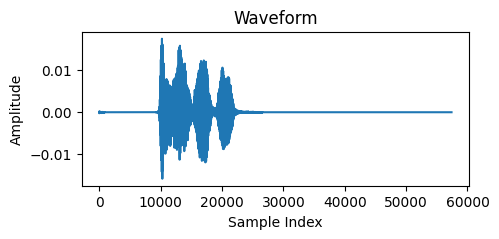

In [11]:
tp = '/content/drive/MyDrive/dataset/single-channel/denoised_test/002724b7ea.wav'
# plot_amplitude_waveform(tp)
sample_audio(tp)

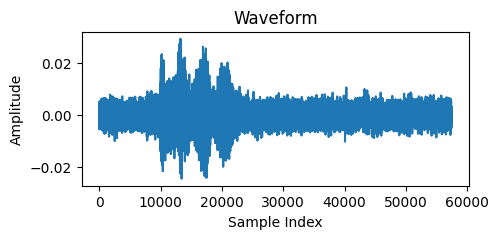

In [12]:
tp = '/content/drive/MyDrive/dataset/single-channel/test/002724b7ea.wav'
# plot_amplitude_waveform(tp)
sample_audio(tp)

In [13]:
def amplify_audio(input_file, amplification_factor):
    # Load audio file
    waveform, sample_rate = torchaudio.load(input_file)

    # Amplify the audio signal
    amplified_waveform = waveform * amplification_factor

    return amplified_waveform

In [14]:
# Example usage
input_audio_path = '/content/drive/MyDrive/dataset/single-channel/denoised_test/002724b7ea.wav'

amplification_factor = 150 # Adjust the factor as needed

xx = amplify_audio(input_audio_path, amplification_factor)

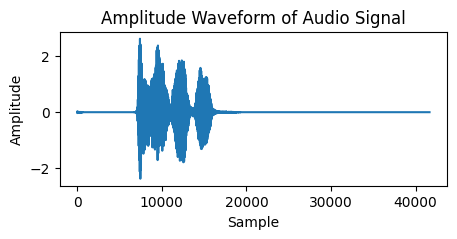

In [15]:
plt.figure(figsize=(5, 2))
plt.plot(xx[0].numpy())
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Amplitude Waveform of Audio Signal')
plt.show()

In [ ]:
max(xx[0])

tensor(2.6184)

In [ ]:
# train_pat

In [22]:
tp_li = list(train_paths.items())
tp_li[:3]

[('spk_32-32_39_1_0_d1_ch5',
  '/content/drive/MyDrive/dataset/single-channel/denoised/spk_32-32_39_1_0_d1_ch5.wav'),
 ('spk_25-25_38_0_0_d6_ch5',
  '/content/drive/MyDrive/dataset/single-channel/denoised/spk_25-25_38_0_0_d6_ch5.wav'),
 ('spk_39-39_21_0_0_d5_ch5',
  '/content/drive/MyDrive/dataset/single-channel/denoised/spk_39-39_21_0_0_d5_ch5.wav')]

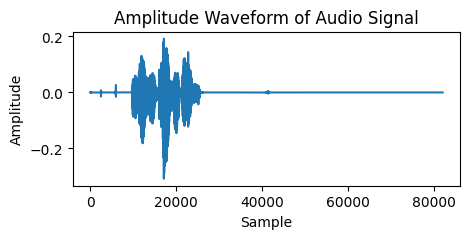

In [16]:
sample_audio2('/content/drive/MyDrive/dataset/single-channel/denoised/spk_36-36_11_0_0_d6_ch5.wav')

In [23]:
train_df.head()

,id,path,enroll_id
0,spk_32-32_39_1_0_d1_ch5,/content/drive/MyDrive/dataset/single-channel/...,spk_32
1,spk_25-25_38_0_0_d6_ch5,/content/drive/MyDrive/dataset/single-channel/...,spk_25
2,spk_39-39_21_0_0_d5_ch5,/content/drive/MyDrive/dataset/single-channel/...,spk_39
3,spk_39-39_21_0_1_d2_ch5,/content/drive/MyDrive/dataset/single-channel/...,spk_39
4,spk_26-26_38_0_0_d3_ch5,/content/drive/MyDrive/dataset/single-channel/...,spk_26


In [57]:
def paths(fpath):
    '''
    Chill..

    fpath: Folder Path
    '''
    wav_paths = []
    for dirname, _, filenames in os.walk(fpath):
        for filename in filenames:
            if filename.endswith('.wav'):
                wav_paths.append(os.path.join(dirname, filename))
    return wav_paths


In [58]:
enr_paths = paths('/content/drive/MyDrive/dataset/single-channel/enrollment')
enr_paths[:3]

['/content/drive/MyDrive/dataset/single-channel/enrollment/spk_13-13_19_0_1_d4_ch5.wav',
 '/content/drive/MyDrive/dataset/single-channel/enrollment/spk_13-13_19_0_1_d5_ch5.wav',
 '/content/drive/MyDrive/dataset/single-channel/enrollment/spk_17-17_1_1_1_d6_ch5.wav']

In [59]:
mx_amp = []

for row in tqdm(enr_paths, total=len(enr_paths)):
    waveform, _ = torchaudio.load(row)
    mx = np.max(waveform.numpy())
    mx_amp.append(mx)

  0%|          | 0/225 [00:00<?, ?it/s]

In [62]:
mx_amp = sorted(mx_amp, reverse=0)
mx_amp[:10]

[0.004486084,
 0.0049438477,
 0.0061950684,
 0.021759033,
 0.035705566,
 0.099487305,
 0.11465454,
 0.12063599,
 0.13058472,
 0.14968872]

In [40]:
import torchaudio
import numpy as np
from tqdm.notebook import tqdm

mx_amp = []

for index, row in tqdm(train_df.iterrows(), total=len(train_df)):
    waveform, _ = torchaudio.load(row['path'])
    mx = np.min(waveform.numpy())
    mx_amp.append(mx)


  0%|          | 0/225 [00:00<?, ?it/s]

In [42]:
mx_amp = sorted(mx_amp, reverse=1)
mx_amp[:10]

[-3.0517578e-05,
 -6.1035156e-05,
 -6.1035156e-05,
 -0.00018310547,
 -0.003967285,
 -0.11065674,
 -0.11672974,
 -0.12145996,
 -0.15081787,
 -0.1557312]

In [43]:
np.mean(mx_amp)

-0.7411519

In [37]:
statistics.mode(mx_amp)

1.0

In [44]:
def normalize_audio(audio_path):
    # Load audio file
    waveform, _ = torchaudio.load(audio_path)

    # Calculate the maximum absolute value
    max_amplitude = torch.max(torch.abs(waveform))

    # Normalize the audio signal to the range [-1, 1]
    normalized_audio = waveform / max_amplitude

    return normalized_audio

In [49]:
tp = '/content/drive/MyDrive/dataset/single-channel/denoised_test/002724b7ea.wav'
x = normalize_audio(tp)

In [51]:
max(x[0])

tensor(1.)

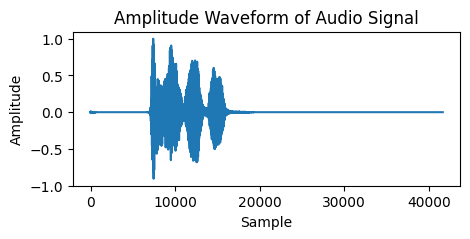

In [52]:
plt.figure(figsize=(5, 2))
plt.plot(x[0].numpy())
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Amplitude Waveform of Audio Signal')
plt.show()

In [63]:
def normalize_and_save(audio_path):
    # Load audio file
    waveform, sample_rate = torchaudio.load(audio_path)

    # Calculate the maximum absolute value
    max_amplitude = torch.max(torch.abs(waveform))

    # Normalize the audio signal to the range [-1, 1]
    normalized_audio = waveform / max_amplitude

    # Save the normalized audio to the same file path
    torchaudio.save(audio_path, normalized_audio, sample_rate)

In [64]:
# Example usage
normalize_and_save(tp)

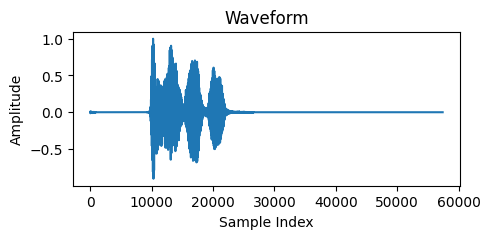

In [65]:
sample_audio(tp)

## Test another One

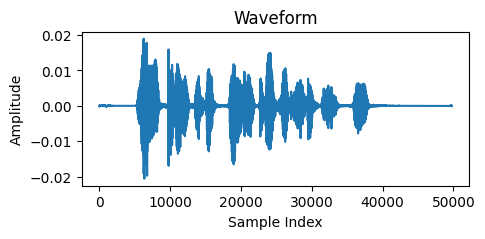

In [66]:
tp = '/content/drive/MyDrive/dataset/single-channel/denoised_test/008a2d1b07.wav'
sample_audio(tp)

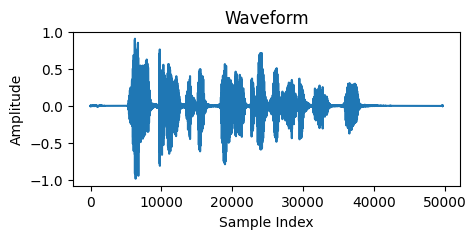

In [67]:
normalize_and_save(tp)
sample_audio(tp)

## Now replace all the files in the denoised_test

In [68]:
dn_test_paths = paths('/content/drive/MyDrive/dataset/single-channel/denoised_test')
dn_test_paths[:2]

['/content/drive/MyDrive/dataset/single-channel/denoised_test/10649ae41b.wav',
 '/content/drive/MyDrive/dataset/single-channel/denoised_test/117cb3db28.wav']

In [69]:
len(dn_test_paths)

10332

In [71]:
# for audio_path in tqdm(dn_test_paths, total=len(dn_test_paths)):
#     normalize_and_save(audio_path)

In [77]:
import multiprocessing

# Get the number of CPU cores in Colab
num_cores = multiprocessing.cpu_count()

print("Number of CPU cores in Colab:", num_cores)

# with ThreadPoolExecutor(max_workers=max_workers)

Number of CPU cores in Colab: 2


In [76]:
from concurrent.futures import ThreadPoolExecutor

# Using ThreadPoolExecutor for parallel processing with tqdm
with ThreadPoolExecutor() as executor:
    list(tqdm(executor.map(normalize_and_save, dn_test_paths), total=len(dn_test_paths), desc='Processing'))

Processing:   0%|          | 0/10332 [00:00<?, ?it/s]

## Now check

In [78]:
mx_amp = []

for row in tqdm(dn_test_paths, total=len(dn_test_paths)):
    waveform, _ = torchaudio.load(row)
    mx = np.max(waveform.numpy())
    mx_amp.append(mx)

  0%|          | 0/10332 [00:00<?, ?it/s]

In [80]:
mx_amp = sorted(mx_amp, reverse=0)
mx_amp[:10]

[0.15093994,
 0.25,
 0.2680664,
 0.34783936,
 0.3999939,
 0.3999939,
 0.4071045,
 0.4300537,
 0.45437622,
 0.4727173]

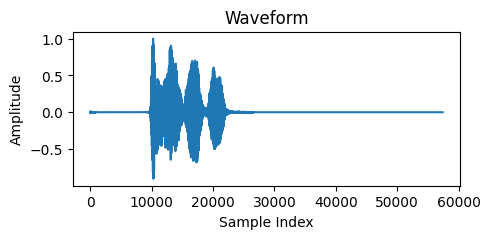

In [81]:
sample_audio('/content/drive/MyDrive/dataset/single-channel/denoised_test/002724b7ea.wav')

In [ ]:
# Example usage
input_audio_path = '/content/drive/MyDrive/dataset/single-channel/test/0000f88619.wav'
xx = amplify_audio(input_audio_path, amplification_factor)

In [ ]:
filename = '/content/drive/MyDrive/dataset/single-channel/denoised/spk_10-10_21_0_0_d2_ch5.wav'
data, sr = torchaudio.load(filename)
emb1 = model.encode_batch(data.to(device))
emb1

tensor([[[ -8.4040,  16.9756,  11.2274,  18.7301, -12.6021,   1.2977, -29.9288,
           14.9456, -25.2074,   5.0597,  50.1707,  22.8876,  10.5257, -13.8326,
          -25.0297, -35.4128, -19.4204,   7.7916,  13.8472,   4.9116,  15.5405,
          -10.2478, -34.8007,  36.1329,  18.4080,  19.2221,  30.5858,  20.4422,
           -3.4970, -18.5178, -27.0203,  -3.8449,  32.7907, -27.8979,   8.8085,
          -35.8322,  -8.6733, -33.1280,   6.8531,  14.0441, -34.8612, -78.0312,
          -17.8209,  24.9694,  11.0925, -60.8727,  16.7154,  10.0074,  -1.0390,
           35.3436,  12.0703,  55.0221, -27.5961,  48.7765,  -2.3899, -23.6865,
            9.7888,  15.9097,  10.4152, -20.8632,  31.7260,  78.9273, -14.6452,
           38.8837,  16.2211,   1.9309,   8.0206, -54.1662,   2.5431,  16.6007,
           31.8984,  23.3988, -28.3554, -12.5499,  19.5383,  -5.1334,  -9.2043,
           -8.9274,   7.8655,  16.7040,  38.4894, -18.6395,  -7.2028,  -6.8999,
           19.0387,   7.9457,   2.2820, 

In [18]:
def get_paths(fpath):
    '''
    Chill..

    fpath: Folder Path
    '''
    paths = {}
    for dirname, _, filenames in os.walk(fpath):
        for filename in filenames:
            paths[os.path.splitext(filename)[0]] = os.path.join(dirname, filename)
    return paths

In [19]:
test_paths = get_paths('/content/drive/MyDrive/dataset/single-channel/denoised_test')
len(list(test_paths.items()))

10332

In [20]:
train_paths = get_paths('/content/drive/MyDrive/dataset/single-channel/denoised')
len(list(train_paths.items()))

225

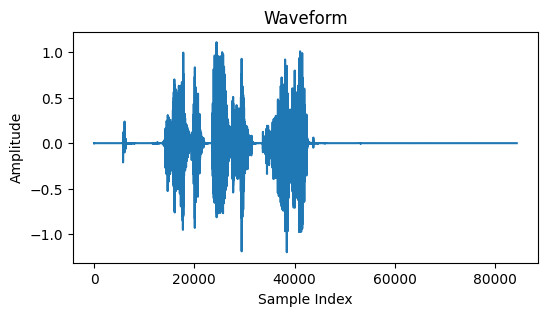

In [ ]:
tp = '/content/drive/MyDrive/dataset/single-channel/denoised/spk_10-10_21_0_0_d2_ch5.wav'
sample_audio(tp)

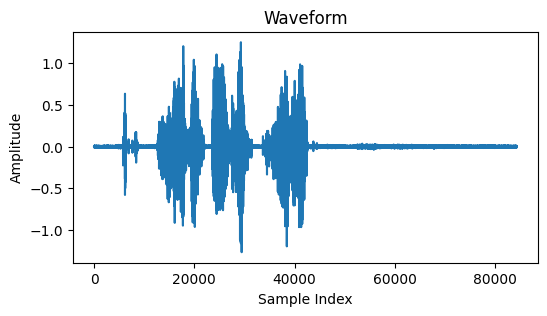

In [ ]:
tp = '/content/drive/MyDrive/dataset/single-channel/enrollment/spk_10-10_21_0_0_d2_ch5.wav'
sample_audio(tp)

In [17]:
file_path = '/content/drive/MyDrive/dataset/single-channel/signle-channel-trials.trl'

cname = ['id', 'fname']

trial_df = pd.read_csv(file_path, delimiter='\t', header=None, names=cname)
trial_df.head()

,id,fname
0,spk_71,b80bb95d16
1,spk_71,e64da37b33
2,spk_71,c22d8f9d8a
3,spk_71,20e087d5bf
4,spk_71,c5396d4af7


In [ ]:
def cosine_distance(vector1, vector2):
    '''
    vector1: shape 6144
    vector2: shape 6144
    '''
    vector1 = np.array(vector1).reshape(1, -1)
    vector2 = np.array(vector2).reshape(1, -1)

    similarity_matrix = cosine_similarity(vector1, vector2)

    distance = 1 - similarity_matrix[0, 0]

    return distance

In [21]:
train_df = pd.DataFrame(list(train_paths.items()), columns=['id', 'path'])
#train_df['enroll_id'] = train_df['id'].str[:6]
train_df['enroll_id'] = train_df['id'].apply(lambda x: re.match(r'[^-]+', x).group(0))
train_df.head(2)

,id,path,enroll_id
0,spk_32-32_39_1_0_d1_ch5,/content/drive/MyDrive/dataset/single-channel/...,spk_32
1,spk_25-25_38_0_0_d6_ch5,/content/drive/MyDrive/dataset/single-channel/...,spk_25


In [ ]:
def get_embeddings(filename):
    data, sr = torchaudio.load(filename)
    emb1 = model.encode_batch(data)

    return emb1

In [ ]:
def noob_processing(df):
    for index, row in tqdm(df.iterrows(), total=len(df), desc='Processing'):
        truedf = train_df[train_df['enroll_id']==row['id']]
        truedf = truedf.reset_index()
        true_path = truedf['path'][0]
#         true_path = train_dict[row['id']]


    #     print(true_path)
        true_emb = get_embeddings(true_path)
        #print(true_emb.shape)

        test_emb = get_embeddings(test_paths[row['fname']])
        #print(test_emb.shape)
        result = cosine_distance(true_emb, test_emb)
        df.at[index, 'score'] = result
    return df

In [ ]:
from collections import defaultdict


def processing(df):
    # Initialize a dictionary to store test embeddings
    test_embedding_cache = defaultdict(lambda: None)

    for index, row in tqdm(df.iterrows(), total=len(df), desc='Processing'):
        enroll_id = row['id']

        # Obtain the true embedding
        truedf = train_df[train_df['enroll_id'] == enroll_id].reset_index()
        true_path = truedf['path'][0]
        true_emb = get_embeddings(true_path)

        test_path = test_paths[row['fname']]

        # Check if the test embedding is already in the cache
        test_emb = test_embedding_cache.get(test_path, None)

        if test_emb is None:
            # If not in the cache, compute and store in the cache
            test_emb = get_embeddings(test_path)
            test_embedding_cache[test_path] = test_emb

        result = cosine_distance(true_emb, test_emb)
        df.at[index, 'score'] = result

    return df

In [ ]:
processing(trial_df[:7])

Processing: 100%|██████████| 7/7 [00:18<00:00,  2.62s/it]


,id,fname,score
0,spk_71,b80bb95d16,0.916092
1,spk_71,e64da37b33,0.850278
2,spk_71,c22d8f9d8a,0.907588
3,spk_71,20e087d5bf,0.861483
4,spk_71,c5396d4af7,0.859124
5,spk_71,07e622c018,0.922785
6,spk_71,70d3397783,0.814464


In [ ]:
# processing(trial_df)

In [ ]:
# trial_df

In [ ]:
filt = trial_df[:2]
filt

In [ ]:
trial_df

,id,fname,score
0,spk_71,b80bb95d16,0.916092
1,spk_71,e64da37b33,0.850278
2,spk_71,c22d8f9d8a,0.907588
3,spk_71,20e087d5bf,0.861483
4,spk_71,c5396d4af7,0.859124
...,...,...,...
102553,spk_9,d1dace1ec5,NaN
102554,spk_9,5db262e132,NaN
102555,spk_9,ff2a6ce91c,NaN
102556,spk_9,32af828478,NaN


# Try Nannu Way

#give the path of desired file
here x1_dir=enrollment <br>
x2_dir=test

In [ ]:
test_file='/content/drive/MyDrive/dataset/single-channel/signle-channel-trials.trl'
x1_dir='/content/drive/MyDrive/dataset/single-channel/denoised'
x2_dir='/content/drive/MyDrive/dataset/single-channel/denoised_test'

In [ ]:
def name_extractor(x1,dir):
   output_list=[]
   c=0
   for filename in os.listdir(dir):
      if filename.endswith('.wav'):
          audio_filepath = os.path.join(dir, filename)
          label = filename.split('-')[0]
          c+=1
          if label==x1:
            output_list.append(audio_filepath)

   return output_list


In [ ]:
columns = ['enroll ID', 'test ID', 'score']
submit_df = pd.DataFrame(columns=columns)

# Read the TSV file into a pandas DataFrame
trials_df = pd.read_csv(test_file, sep='\t',header=None,encoding='utf-8')

# Now 'df' is a pandas DataFrame containing your data
submit_df

,enroll ID,test ID,score


In [ ]:
trials_df.head(3)

,0,1
0,spk_71,b80bb95d16
1,spk_71,e64da37b33
2,spk_71,c22d8f9d8a


In [ ]:
c=0
for filename in os.listdir('/content/drive/MyDrive/dataset/single-channel/denoised_test'):
  c+=1
print(c)

10332


In [ ]:
# Helper function to compute embeddings for a batch of audio paths
def compute_batch_embeddings(audio_paths):
    embeddings = []
    for path in audio_paths:
        embedding = get_embeddings(path).cpu().squeeze().numpy()
        embeddings.append(embedding)
    return np.array(embeddings)

In [ ]:
filt = trials_df[:2]
filt

,0,1
0,spk_71,b80bb95d16
1,spk_71,e64da37b33


In [ ]:
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np

# Assuming cosine similarity function is imported
from scipy.spatial.distance import cosine


def makeit(filt):

  tqdm_iterator = tqdm(filt.iterrows(), total=len(filt), desc='Processing Rows')

  # Initialize an empty list to store data for faster concatenation
  data_to_add_list = []

  # Dictionary to store computed embeddings for enroll audios
  computed_embeddings_x1 = {}
  computed_embeddings_x2 = {}

  # Batch size for embeddings processing
  batch_size = 16
  # tqdm_iterator

  # Iterate through rows using tqdm
  for index, row in tqdm_iterator:
      x1, x2 = row[0], row[1]
      x1_path = name_extractor(x1, x1_dir)
      x2_path = '/content/drive/MyDrive/dataset/single-channel/denoised_test/' + x2 + '.wav'

      # Use cached embeddings if available, otherwise compute and cache for x1
      if x1 not in computed_embeddings_x1:
          computed_embeddings_x1[x1] = compute_batch_embeddings(x1_path)

      emb_x1 = computed_embeddings_x1[x1]

      # Use cached embeddings if available, otherwise compute and cache for x2
      if x2 not in computed_embeddings_x2:
          computed_embeddings_x2[x2] = compute_batch_embeddings([x2_path])[0]

      emb_x2 = computed_embeddings_x2[x2]

      # # Compute cosine similarity for each dimension separately
      # dimension_wise_cosine = 1.0 - np.dot(emb_x1, emb_x2) / (np.linalg.norm(emb_x1) * np.linalg.norm(emb_x2))

      # print(emb_x2)

      dmwc = []
      dmwc.append(cosine_distance(emb_x1[0], emb_x2))
      dmwc.append(cosine_distance(emb_x1[1], emb_x2))
      dmwc.append(cosine_distance(emb_x1[2], emb_x2))
      # print(dmwc)
      # dmwc = 1.0 - np.dot(emb_x1, emb_x2) / (np.linalg.norm(emb_x1) * np.linalg.norm(emb_x2))
      # print(dimension_wise_cosine)
      # Aggregate dimension-wise cosine similarities
      distance = min(dmwc)

      # print(dmwc)

      data_to_add_list.append({'enroll ID': x1, 'test ID': x2, 'score': distance})

  return data_to_add_list

In [ ]:
data_to_add = makeit(filt)

Processing Rows:   0%|          | 0/2 [00:00<?, ?it/s]

[0.916091650724411, 0.8728891313076019, 0.9251422137022018]
[0.8502779752016068, 0.991615355014801, 0.8316322267055511]


In [ ]:
data_to_add = makeit(filt)

Processing Rows:   0%|          | 0/2 [00:00<?, ?it/s]

[0.95113057 0.92987925 0.95530576]
[0.9127997 0.9953746 0.8994751]


In [ ]:
data_to_add = makeit(trials_df)

Processing Rows:   0%|          | 0/102558 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
columns = ['enroll ID', 'test ID', 'score']
submit_df = pd.DataFrame(columns=columns)
# Concatenate the list of data dictionaries into a DataFrame
submit_df = pd.concat([submit_df, pd.DataFrame(data_to_add)], ignore_index=True)

In [ ]:
submit_df

,enroll ID,test ID,score
0,spk_71,b80bb95d16,0.899475
1,spk_71,e64da37b33,0.899475


In [ ]:
trial_df

,id,fname,score
0,spk_71,b80bb95d16,0.916092
1,spk_71,e64da37b33,0.850278
2,spk_71,c22d8f9d8a,0.907588
3,spk_71,20e087d5bf,0.861483
4,spk_71,c5396d4af7,0.859124
...,...,...,...
102553,spk_9,d1dace1ec5,NaN
102554,spk_9,5db262e132,NaN
102555,spk_9,ff2a6ce91c,NaN
102556,spk_9,32af828478,NaN


In [ ]:
trial_df.to_csv('output_filen.tsv', sep='\t', index=False, header=False,encoding='utf-8')

In [ ]:
trial_df.to_csv('output_fileo.csv',index=False, header=False,encoding='utf-8')